In [7]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import csv # Para guardar la informacion en un archivo CSV

headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/120.0.0.0 Safari/537.36"
}

In [8]:
base_url = "https://www.airlinequality.com/airport-reviews/lima-airport"
pages = 10
page_size = 100

reviews = []

# for i in range(1, pages + 1):
for i in range(1, pages + 1):

    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url, headers= headers)

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())
    
    print(f"   ---> {len(reviews)} total reviews")

Scraping page 1
   ---> 61 total reviews
Scraping page 2
   ---> 61 total reviews
Scraping page 3
   ---> 61 total reviews
Scraping page 4
   ---> 61 total reviews
Scraping page 5
   ---> 61 total reviews
Scraping page 6
   ---> 61 total reviews
Scraping page 7
   ---> 61 total reviews
Scraping page 8
   ---> 61 total reviews
Scraping page 9
   ---> 61 total reviews
Scraping page 10
   ---> 61 total reviews


In [3]:
df = pd.DataFrame()
df["reviews"] = reviews
df.head()

,reviews
0,✅ Trip Verified | Which airport can be worse...
1,Not Verified | Despite arriving at the airpo...
2,✅ Trip Verified | Security was super helpful! ...
3,"✅ Trip Verified | Flew both into, and out of,..."
4,✅ Trip Verified | After many years (since 2007...


In [9]:
df.to_csv("reviews.csv")

## Analisis de Sentimientos

In [13]:
#!pip install nltk
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [17]:
# Frase a analizar
x = "I love this airplane"
y = "I hate this airplane"
z = "I have nothing to say"

In [18]:
sia = SentimentIntensityAnalyzer()
resultSentimiento = sia.polarity_scores(x)
print(resultSentimiento)

{'neg': 0.0, 'neu': 0.323, 'pos': 0.677, 'compound': 0.6369}


## Aplicar este análisis para varias frases

In [20]:
import pandas as pd

dfFrase = pd.read_csv("reviews.csv")
dfFrase.head()

dfFrase['Sentimiento'] = dfFrase['mensaje'].apply(lambda texto: sia.polarity_scores(texto)["compound"])
dfFrase.to_csv("mensajes_sentimientos.csv")

def analizar_sentimiento(texto):
    sia = SentimentIntensityAnalyzer()
    sentimiento = sia.polarity_scores(texto)["compound"]

    if sentimiento >0.1:
        return "Sentimiento positivo"
    elif sentimiento <0:
        return "Sentimiento negativo"
    else:
        return "Sentimiento neutral"

In [21]:
dfFrase['Sentimiento'] = dfFrase['mensaje'].apply(analizar_sentimiento)
dfFrase.head()

,mensaje,Sentimiento
0,""" Which airport can be worse than Lima Inte...",Sentimiento positivo
1,"""Despite arriving at the airport three hours e...",Sentimiento positivo
2,""" Security was super helpful! As we were pass...",Sentimiento positivo
3,""" Flew both into, and out of, Lima airport. ...",Sentimiento positivo
4,"""After many years (since 2007 +/-) I frequent ...",Sentimiento negativo


In [22]:
sentimiento = analizar_sentimiento(x)
print(sentimiento)

Sentimiento positivo


In [23]:
def get_subjectivity(text):
  return TextBlob(text).sentiment.subjectivity

def get_polarity(text):
  return TextBlob(text).sentiment.polarity

In [24]:
from textblob import TextBlob 
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [25]:
dfFrase['Subjectivity'] = dfFrase['mensaje'].apply(get_subjectivity)
dfFrase['Polarity'] = dfFrase['mensaje'].apply(get_polarity)

dfFrase.head()

,mensaje,Sentimiento,Subjectivity,Polarity
0,""" Which airport can be worse than Lima Inte...",Sentimiento positivo,0.385714,-0.031548
1,"""Despite arriving at the airport three hours e...",Sentimiento positivo,0.327381,0.060714
2,""" Security was super helpful! As we were pass...",Sentimiento positivo,0.476389,0.202778
3,""" Flew both into, and out of, Lima airport. ...",Sentimiento positivo,0.598765,0.404630
4,"""After many years (since 2007 +/-) I frequent ...",Sentimiento negativo,0.495417,-0.080417


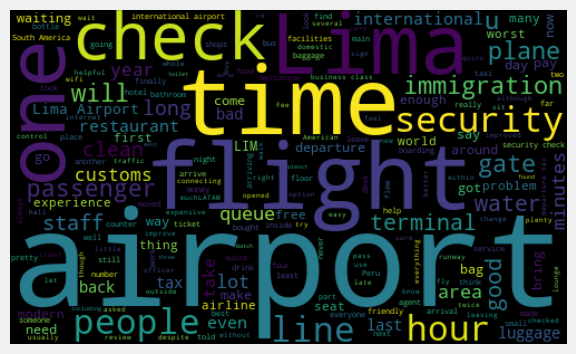

In [26]:
all_words = ' '.join([men for men in dfFrase['mensaje']])
word_cloud = WordCloud(width =500, height=300, random_state=21, max_font_size=119).generate(all_words)

plt.imshow(word_cloud, interpolation= "bilinear")
plt.axis("off")
plt.show()

In [27]:
def analysis(score):
    if score<0:
        return "Negative"
    elif score ==0:
        return "Neutral"
    else:
        return "Positive"

dfFrase['Analysis'] = dfFrase['Polarity'].apply(analysis)
dfFrase

,mensaje,Sentimiento,Subjectivity,Polarity,Analysis
0,""" Which airport can be worse than Lima Inte...",Sentimiento positivo,0.385714,-0.031548,Negative
1,"""Despite arriving at the airport three hours e...",Sentimiento positivo,0.327381,0.060714,Positive
2,""" Security was super helpful! As we were pass...",Sentimiento positivo,0.476389,0.202778,Positive
3,""" Flew both into, and out of, Lima airport. ...",Sentimiento positivo,0.598765,0.404630,Positive
4,"""After many years (since 2007 +/-) I frequent ...",Sentimiento negativo,0.495417,-0.080417,Negative
...,...,...,...,...,...
56,"""I am certain Lima is not the worst capital ci...",Sentimiento positivo,0.509934,-0.131979,Negative
57,"""I use this airport 5-10 times a year. People ...",Sentimiento positivo,0.445036,0.093238,Positive
58,"""I fly through Lima about twice a year. The te...",Sentimiento positivo,0.406250,0.147917,Positive
59,"""First of all any airport that is undergoing r...",Sentimiento positivo,0.611111,0.333333,Positive


In [160]:
j=1
sortedDF = dfFrase.sort_values(by=['Polarity'])
for i in range(0, sortedDF.shape[0]):
  if(sortedDF['Analysis'][i] == 'Positive'):
    print(str(j) + ') ' + sortedDF['mensaje'][i])
    print()
    j += 1

1) "This time British Airways managed to get everything right. The price of the tickets was reasonable and the timing was perfect. Boarding was smooth and the seats were comfortable - easy reline to enable dozing and sufficient pitch to get in and out. The table was firm enough to allow the use of a small laptop and mouse. A pre-flight soft drink or Prosecco was offered and both the food and drink were more than sufficient. The best part was the cabin crew - two in PE and they were both extremely efficient, pleasant and witty. There was a good selection of movies and both the screen and the headset worked perfectly. "

2) "   The seats were excellent, with a feel of much more room than the official seat pitch (I am 6ft 1in). We could sleep for a couple of hours (daytime flight), with the blinds down as they should be (no point booking a window seat in my view). I focus on seat quality much more than smiley faces and food (the food was middling, and the second meal, before landing, was 

In [28]:

j=1
sortedDF = dfFrase.sort_values(by=['Polarity'], ascending=False)
for i in range(0, sortedDF.shape[0]):
  if(sortedDF['Analysis'][i] == 'Negative'):
    print(str(j) + ') ' + sortedDF['mensaje'][i])
    print()
    j += 1

1) "    Which airport can be worse than Lima International? There is always line in women's bathroom, because each women's bathroom has three toilet stalls and four think. They let you keep water bottle at security, to enter the gate area, but at the gate they have 6 agents who check your carry ones and personal bags and confiscate all liquid, including the bottles of water which we just bought at duty free area. I'm a diabetic and need to drink a lot of water. So I was thirsty all 6 hours of flight. Little cups of water which flight attendants give is not enough. "

2) "After many years (since 2007 +/-) I frequent this airport I have seen NO improvement. My last visit was on JAN 2023. Why? - Almost no place to sit unless you are in a restaurant - bad choice of restaurants, even if the food is fine in a very few of them - Crampy and not comfortable bathrooms - No airport WiFi - Complicated and lengthy lines at customs (but here there is another responsibility too). In conclusion: it re

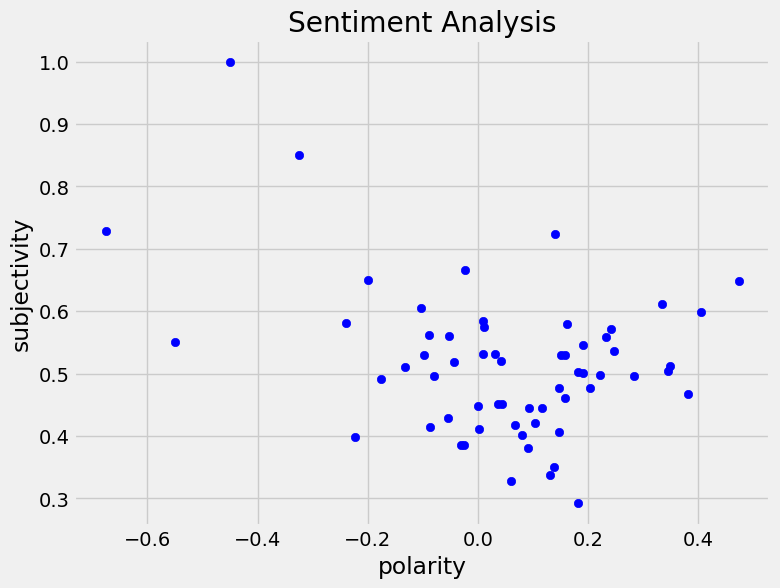

In [32]:
plt.figure(figsize=(8,6))
for i in range(0, dfFrase.shape[0]):
  plt.scatter(dfFrase['Polarity'][i], dfFrase['Subjectivity'][i], color='blue')

plt.title('Sentiment Analysis')
plt.xlabel('polarity')
plt.ylabel('subjectivity')
plt.show()

In [33]:

ptmesage = dfFrase[dfFrase.Analysis == 'Positive']
pteet = ptmesage ['mensaje']

round(ptmesage.shape[0] / dfFrase.shape[0] * 100, 1)

67.2

In [34]:
ptmesage = dfFrase[dfFrase.Analysis == 'Negative']
pteet = ptmesage ['mensaje']

round(ptmesage.shape[0] / dfFrase.shape[0] * 100, 1)

32.8

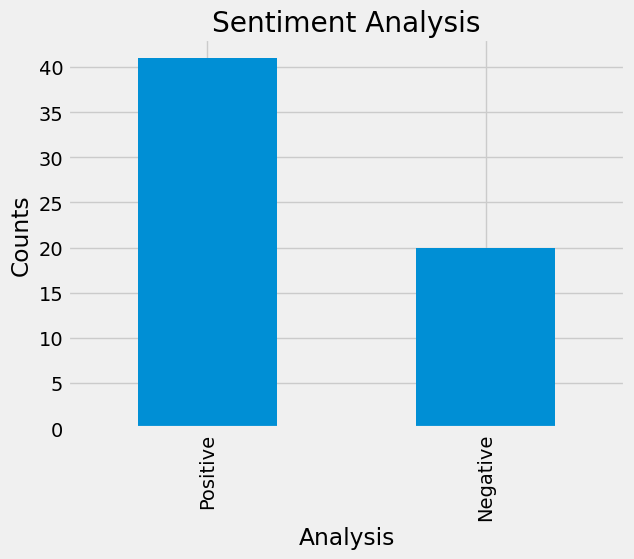

In [35]:
dfFrase['Analysis'].value_counts()

plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
dfFrase['Analysis'].value_counts().plot(kind='bar')
plt.show()